# Chapter 11. Time Series
**Anything that is observed or measured at many points in time forms a time series**
* **Many time series are fixed frequence: Data points at regular intervals**
* **Time series can also be irregular: without a fixed unit of time or offset between units**
**How to mark and refer to time series data:**
* ***Timestamps*: specific instants in time**
* ***Fixed periods* :suhc as the month in january**
* ***Intervals of time*: indicated by start and end timestample**
* ***Experiment or elapsed time* :Each timestamp is a measure of time relative to a particular start time**


## 11.1 Date and Time Data Types and Tools
datetime.datetime **module**<br>
datetime **stores both the date and time down to the microsecond**<br>

In [26]:
from datetime import datetime

In [27]:
now=datetime.now()

In [28]:
now

datetime.datetime(2020, 9, 20, 13, 46, 14, 33372)

In [29]:
now.year,now.month,now.day

(2020, 9, 20)

timedelta **represents the temporal difference between two** datetime **objects**

In [30]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [32]:
delta

datetime.timedelta(days=926, seconds=56700)

In [33]:
delta.days

926

In [34]:
delta.seconds

56700

**You can add(or subtract) a** timedelta **or multiple thereof to a** datetime **object to yield a new shifted object**

In [35]:
from datetime import timedelta

In [36]:
start=datetime(2011,11,7)

In [37]:
start+timedelta(12)

datetime.datetime(2011, 11, 19, 0, 0)

In [38]:
start-2*timedelta(12)

datetime.datetime(2011, 10, 14, 0, 0)

### Converting Between String and Datetime
**Format** datetime **objects and pandas** Timestamp **objects**

In [39]:
stamp=datetime(2011,1,3)

In [40]:
str(stamp)

'2011-01-03 00:00:00'

In [41]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

**Using many of the same format codes to convert strings to dates using** datetime.strptime

In [42]:
value='2011-01-03'

In [43]:
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [44]:
datestrs=['7/6/2011','8/6/2011']

In [45]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

**To parse dates without writing a datetime format**

In [46]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil **is capable of parsing most human-intelligible date representations**

In [47]:
parse('Jan 31, 1997 10:45PM')

datetime.datetime(1997, 1, 31, 22, 45)

**Pass** dayfirst=True **to indicate day appearing befroe every month**

In [48]:
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

**In** pandas, **the** to_datetime **method parses many different kinds of date representations**

In [49]:
datestrs=['2017-07-06 12:00:00','2011-08-06 00:00:00']

In [50]:
import pandas as pd
import numpy as np

In [51]:
pd.to_datetime(datestrs)

DatetimeIndex(['2017-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

pandas **also handles values that should be considered missing**

In [52]:
idx=pd.to_datetime(datestrs+[None])

In [53]:
idx

DatetimeIndex(['2017-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [54]:
pd.isnull(idx)

array([False, False,  True])

NaT **is panda's null value for timestamp data**

## 11.2 Time Series Basics

**A basic kind of time series object in pandas is a Series indexed by timestamps,which is often represented external to pandas as Pythonstrings or** datetime **objects**

In [55]:
from datetime import datetime
dates=[datetime(2011,1,1),datetime(2011,11,5),
      datetime(2011,1,7),datetime(2011,1,8),
      datetime(2011,1,10),datetime(2011,1,12)]

In [56]:
ts=pd.Series(np.random.randn(6),index=dates)

In [57]:
ts

2011-01-01   -0.514960
2011-11-05    1.416498
2011-01-07   -0.259646
2011-01-08    0.758080
2011-01-10   -1.794806
2011-01-12   -1.590925
dtype: float64

**Under the hood, these** datetime **objects have been put in a** DatetimIndex

In [58]:
ts.index

DatetimeIndex(['2011-01-01', '2011-11-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

**Like other Series, arithmetic operations between differently indexed time series automatically align of the dates**

In [59]:
ts+ts[::2]

2011-01-01   -1.029920
2011-01-07   -0.519292
2011-01-08         NaN
2011-01-10   -3.589611
2011-01-12         NaN
2011-11-05         NaN
dtype: float64

pandas **stores timestamps using Numpy's** datetime64 **data type at the nanosecond resolution**

In [60]:
ts.index.dtype

dtype('<M8[ns]')

**Scalar values from a** DatetimeIndex **are** Timestamp **objects**

In [61]:
stamp=ts.index[0]

In [62]:
stamp

Timestamp('2011-01-01 00:00:00')

**A** Timestamp **can be substitued anywhere you would use a** datetime **object**<br>
**It can store frequency infomation(if any) and understands how to do time zone conversions and other kinds of manipulations**

### Indexing, Selection, Subsetting

**Time series behaves like any other** pandas.Series **when you are indexing and selecting data based on label**

In [63]:
stamp=ts.index[2]

In [64]:
ts[stamp]

-0.2596460333669785

**You can also pass a string that is interpretable as a date**

In [65]:
ts['1/10/2011']

2011-01-10   -1.794806
dtype: float64

In [66]:
ts['20110110']

2011-01-10   -1.794806
dtype: float64

**For longer time series, a year or only a year and month can be passed to easily slices of data**

In [67]:
longer_ts=pd.Series(np.random.rand(1000),
                   index=pd.date_range('1/1/2000',periods=1000))

In [68]:
longer_ts

2000-01-01    0.497818
2000-01-02    0.687843
2000-01-03    0.967645
2000-01-04    0.926335
2000-01-05    0.177293
                ...   
2002-09-22    0.432360
2002-09-23    0.259037
2002-09-24    0.701386
2002-09-25    0.279921
2002-09-26    0.006579
Freq: D, Length: 1000, dtype: float64

In [69]:
longer_ts['2001']#string '2001' is interpreted as year and selects that time period

2001-01-01    0.635350
2001-01-02    0.328874
2001-01-03    0.753865
2001-01-04    0.158936
2001-01-05    0.099564
                ...   
2001-12-27    0.741044
2001-12-28    0.053192
2001-12-29    0.992171
2001-12-30    0.648803
2001-12-31    0.376548
Freq: D, Length: 365, dtype: float64

In [70]:
longer_ts['2001-05']#Alsoe works if you specify the month

2001-05-01    0.829750
2001-05-02    0.333545
2001-05-03    0.246404
2001-05-04    0.170131
2001-05-05    0.601217
2001-05-06    0.108331
2001-05-07    0.219621
2001-05-08    0.440532
2001-05-09    0.780560
2001-05-10    0.887855
2001-05-11    0.678897
2001-05-12    0.487453
2001-05-13    0.926071
2001-05-14    0.794808
2001-05-15    0.593134
2001-05-16    0.285635
2001-05-17    0.271661
2001-05-18    0.547902
2001-05-19    0.847156
2001-05-20    0.438274
2001-05-21    0.560229
2001-05-22    0.220347
2001-05-23    0.015679
2001-05-24    0.113790
2001-05-25    0.513031
2001-05-26    0.887669
2001-05-27    0.753814
2001-05-28    0.561293
2001-05-29    0.665846
2001-05-30    0.171688
2001-05-31    0.627308
Freq: D, dtype: float64

**Slicing with** datetime **objects works as well**

In [71]:
ts[datetime(2011,1,7)]

-0.2596460333669785

**Because most time series data is ordered choronlogically, you can slice with timestamps not contained in a time series to perform a range query**

In [72]:
ts

2011-01-01   -0.514960
2011-11-05    1.416498
2011-01-07   -0.259646
2011-01-08    0.758080
2011-01-10   -1.794806
2011-01-12   -1.590925
dtype: float64

In [73]:
ts['1-6-2011':'1-11-2011']

2011-01-07   -0.259646
2011-01-08    0.758080
2011-01-10   -1.794806
dtype: float64

**You can pass either a string date,** datetime **,or timestamp**<br>
**Slicing in this manner produces views on the source time series like slicing NumPy arrys:**
* **This means that no data is copied and modifications on the slice will be reflcted in the original data**

truncate **method**

In [74]:
ts.sort_index(inplace=True)#needs to sort the datetime first before use

In [75]:
ts.truncate(after='1/9/2011')

2011-01-01   -0.514960
2011-01-07   -0.259646
2011-01-08    0.758080
dtype: float64

**All these holds true for DataFrame as well, indexing on its rows**

In [76]:
dates=pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [77]:
long_df=pd.DataFrame(np.random.randn(100,4),index=dates,
                    columns=['Colorado','Texas','New York','Ohio'])

In [78]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.720512,-0.790668,-0.886402,0.125894
2001-05-09,0.720902,0.626593,1.138818,0.874718
2001-05-16,1.200291,0.243824,1.111889,0.705652
2001-05-23,0.273238,-1.490040,0.009775,0.503610
2001-05-30,0.918626,-0.371700,-1.315765,0.616986


### Time Series with Duplicate Indices

**There may be multiple data observations falling on a particular timestamp**

In [79]:
dates=pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000',
                       '1/2/2000','1/3/2000'])

In [80]:
dup_ts=pd.Series(np.arange(5),index=dates)

In [81]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [82]:
dup_ts.index.is_unique

False

**Time series will now either produce scalar values or slices depending on whether a timestamp is duplicated**

In [83]:
dup_ts['1/3/2000']#not duplicated

4

In [84]:
dup_ts['1/2/2000']#duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

**Aggregate the data having non-unique timestamps:**<br>
* **Pass** groupby **and pass** level=0

## 11.3 Date Ranges, Frequencies, and Shifting

**Convert the time series to be fixed daily frequency by calling** resample

In [85]:
ts

2011-01-01   -0.514960
2011-01-07   -0.259646
2011-01-08    0.758080
2011-01-10   -1.794806
2011-01-12   -1.590925
2011-11-05    1.416498
dtype: float64

In [86]:
resampler=ts.resample('D')#'D' is interpreyed as daily frequency

### Generating Date Ranges

pandas.date_range **is responsible for generating a** DatetimeIndex **with an indicated lenght according to particular frequency**

In [87]:
index=pd.date_range('2012-04-01','2012-06-01')

In [88]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

* **By default, date_range generates daily timestamps**
* **If you pass only a start or end date, you must pass a number of periods to generate**

In [89]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [90]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

**The** start **and** end **dates define strict boundaries for the generated date index**<br>
* **If you wanted a date index conataiing the last business day of each month, you would pass the 'BM' frequency**

In [91]:
pd.date_range('2000-01-01','2002-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30', '2000-12-29',
               '2001-01-31', '2001-02-28', '2001-03-30', '2001-04-30',
               '2001-05-31', '2001-06-29', '2001-07-31', '2001-08-31',
               '2001-09-28', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-29', '2002-04-30',
               '2002-05-31', '2002-06-28', '2002-07-31', '2002-08-30',
               '2002-09-30', '2002-10-31', '2002-11-29'],
              dtype='datetime64[ns]', freq='BM')

date_range **by deafult preserved the time of the start or end timestamp**

In [92]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

**Sometimes you will have start or end date with time information but want to generate a set of timestamps *normalized* to midnight as a convention**

In [93]:
pd.date_range('2012-05-02 12:56:31',periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets
* **Frequncies in pandas are composed of a base frequency and a multiplier**
* **Base frequencies are typically referred to by a string alias, like** 'M' **for monthly or** 'H' **for hounrly**
* **For each base frequency, there is an object defined generally rederred to as** *data offset*

In [94]:
from pandas.tseries.offsets import Hour,Minute

In [95]:
hour=Hour()#hourly frequency is represented by the Hour class

In [96]:
hour

<Hour>

**You can define a multiple of an offset by passing an integer**

In [97]:
four_hours=Hour(4)

In [98]:
four_hours

<4 * Hours>

**Putting an integer before the base frequency creates a multiple**

In [99]:
pd.date_range('2001-01-01','2001-01-03 23:59',freq='4h')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 04:00:00',
               '2001-01-01 08:00:00', '2001-01-01 12:00:00',
               '2001-01-01 16:00:00', '2001-01-01 20:00:00',
               '2001-01-02 00:00:00', '2001-01-02 04:00:00',
               '2001-01-02 08:00:00', '2001-01-02 12:00:00',
               '2001-01-02 16:00:00', '2001-01-02 20:00:00',
               '2001-01-03 00:00:00', '2001-01-03 04:00:00',
               '2001-01-03 08:00:00', '2001-01-03 12:00:00',
               '2001-01-03 16:00:00', '2001-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

**Many offsets can be combined together by addition**

In [100]:
Hour(2)+Minute(30)

<150 * Minutes>

**You can pass frequency strings, like** '1h30min', **that will effectively be parsed to the same expression**

In [101]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

*anchored* **offsets: Some frequencies desribe points in time that are not evenly spaced**

### Week of month date
**get dates like the third Friday of each month**

In [102]:
rng=pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')

In [103]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting(Leading and Laggging) Data
* **"Shifting" refers to moving data backward and forward through time**
* **Both Series and DataFrame have** shift **method for doing naive shifts forward or backward, leaving the index unmodified**

In [104]:
ts=pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))

In [105]:
ts

2000-01-31    1.164415
2000-02-29    1.016720
2000-03-31   -0.201624
2000-04-30    0.062769
Freq: M, dtype: float64

In [106]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.164415
2000-04-30    1.016720
Freq: M, dtype: float64

In [107]:
ts.shift(-2)

2000-01-31   -0.201624
2000-02-29    0.062769
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

**When we shift like this, missing data is introduced either at the start or end of the time series**<br>
* **A common use of** shift **computing percent changes in a time series or multiple time series as DataFrame columns**

In [108]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -0.126840
2000-03-31   -1.198308
2000-04-30   -1.311318
Freq: M, dtype: float64

**If the frequency is known, it can be passed to** shift **to advance the timestamps instead of simply the data**

In [109]:
ts.shift(2,freq='M')

2000-03-31    1.164415
2000-04-30    1.016720
2000-05-31   -0.201624
2000-06-30    0.062769
Freq: M, dtype: float64

**Other frequencies can be passed, gicing some flexibility in how to lead and lag the data**

In [110]:
ts.shift(3,freq='D')

2000-02-03    1.164415
2000-03-03    1.016720
2000-04-03   -0.201624
2000-05-03    0.062769
dtype: float64

In [309]:
ts.shift(1,freq='90T')#T stands for minutes

2000-01-31 01:30:00   -0.721960
2000-02-29 01:30:00    0.980277
2000-03-31 01:30:00   -0.841671
2000-04-30 01:30:00    0.475073
Freq: M, dtype: float64

freq **parameter here indicates the offset to apply to the timestamps, but it does not change the underlying frequency of the data**

### Shifting dates with offsets

In [111]:
from pandas.tseries.offsets import Day,MonthEnd

In [112]:
now=datetime(2011,11,17)

In [113]:
now+3*Day()

Timestamp('2011-11-20 00:00:00')

**Anchored offsets can explicitly "roll" dates forward or backward by simply using their** rollforward **and** rollback **methods**

In [114]:
offset=MonthEnd()

In [115]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [116]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

**Use** offsets **with** groupby

In [117]:
ts=pd.Series(np.random.randn(20),
            index=pd.date_range('1/15/2000',periods=20,freq='4d'))

In [119]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.510675
2000-02-29    0.150590
2000-03-31    0.331211
dtype: float64

**Use resampling instead**

In [120]:
ts.resample('M').mean()

2000-01-31    0.510675
2000-02-29    0.150590
2000-03-31    0.331211
Freq: M, dtype: float64

## 11.4 Time Zone Handling
pandas **wraps** pytz's **functionality so you can igonire its API outside of the time zone names**

In [121]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

**To get a time zone object from** pytz

In [122]:
tz=pytz.timezone('America/New_York')

In [123]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

**Methods in pandas will accept either time zone names or these objects**

### Time Zone Localization and Conversion
**By default, time series in pandas are *time zone naive***

In [124]:
rng=pd.date_range('3/9/2019 9:30',periods=6,freq='D')

In [125]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [126]:
ts

2019-03-09 09:30:00    1.274330
2019-03-10 09:30:00    0.222620
2019-03-11 09:30:00    0.275527
2019-03-12 09:30:00   -1.562353
2019-03-13 09:30:00   -1.286453
2019-03-14 09:30:00   -0.546028
Freq: D, dtype: float64

In [128]:
print(ts.index.tz)#the index's tz field is None

None


**Date ranges can be generated with a time zone set**

In [131]:
pd.date_range('3/8/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-08 09:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-10 09:30:00+00:00', '2012-03-11 09:30:00+00:00',
               '2012-03-12 09:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 09:30:00+00:00', '2012-03-15 09:30:00+00:00',
               '2012-03-16 09:30:00+00:00', '2012-03-17 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

**Conversion from naive to** localized **is handled by the** tz_localize **method**

In [132]:
ts

2019-03-09 09:30:00    1.274330
2019-03-10 09:30:00    0.222620
2019-03-11 09:30:00    0.275527
2019-03-12 09:30:00   -1.562353
2019-03-13 09:30:00   -1.286453
2019-03-14 09:30:00   -0.546028
Freq: D, dtype: float64

In [133]:
ts_utc=ts.tz_localize('UTC')

In [134]:
ts_utc.index

DatetimeIndex(['2019-03-09 09:30:00+00:00', '2019-03-10 09:30:00+00:00',
               '2019-03-11 09:30:00+00:00', '2019-03-12 09:30:00+00:00',
               '2019-03-13 09:30:00+00:00', '2019-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

**Once a time series has been localized to a particular time zone, it can be converted to another time zone with** tz_convert

In [135]:
ts_utc.tz_convert('America/New_York')

2019-03-09 04:30:00-05:00    1.274330
2019-03-10 05:30:00-04:00    0.222620
2019-03-11 05:30:00-04:00    0.275527
2019-03-12 05:30:00-04:00   -1.562353
2019-03-13 05:30:00-04:00   -1.286453
2019-03-14 05:30:00-04:00   -0.546028
Freq: D, dtype: float64

**In the case of the preceding time series, which straddles a DST transition in the** America/New_York **time zone, we could localize to EST and convert to UTC or Berlin time**

In [136]:
ts_eastern=ts.tz_localize('America/New_York')

In [137]:
ts_eastern.tz_convert('UTC')

2019-03-09 14:30:00+00:00    1.274330
2019-03-10 13:30:00+00:00    0.222620
2019-03-11 13:30:00+00:00    0.275527
2019-03-12 13:30:00+00:00   -1.562353
2019-03-13 13:30:00+00:00   -1.286453
2019-03-14 13:30:00+00:00   -0.546028
Freq: D, dtype: float64

In [139]:
ts_eastern.tz_convert('Europe/Berlin')

2019-03-09 15:30:00+01:00    1.274330
2019-03-10 14:30:00+01:00    0.222620
2019-03-11 14:30:00+01:00    0.275527
2019-03-12 14:30:00+01:00   -1.562353
2019-03-13 14:30:00+01:00   -1.286453
2019-03-14 14:30:00+01:00   -0.546028
Freq: D, dtype: float64

tz_localize **and** tz_convert **are also instance methods on** Datetime **Index**

In [140]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2019-03-09 09:30:00+08:00', '2019-03-10 09:30:00+08:00',
               '2019-03-11 09:30:00+08:00', '2019-03-12 09:30:00+08:00',
               '2019-03-13 09:30:00+08:00', '2019-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone-Aware Timestamps Objects
**Individual** Timestamp **objects simialrly can be localized from naive to time zone-aware and converted from one time zone to another**

In [141]:
stamp=pd.Timestamp('2011-03-12 04:00')

In [142]:
stamp_utc=stamp.tz_localize('utc')

In [143]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

**You can also pass a time zone when creating the** Timestamp

In [144]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00',tz='Europe/Moscow')

In [145]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

**Time zone-aware** Timestamp **objects internally store a UTC timestamp value as nanoseconds since the Unix epoch(Janurary 1, 1970); the UTC value is invariant between time zone conversion**

In [146]:
stamp_utc.value

1299902400000000000

In [147]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

**When perofriming time arithmetic using panda's** DateOffset **objects, pandas repects daylight saving time transition where possible. Here we construct timestamps that occur right-before DST transition(forward and backward)**

In [149]:
from pandas.tseries.offsets import Hour

In [150]:
stamp=pd.Timestamp('2012-03-11 11:30',tz='US/Eastern')

In [151]:
stamp

Timestamp('2012-03-11 11:30:00-0400', tz='US/Eastern')

In [152]:
stamp+Hour()

Timestamp('2012-03-11 12:30:00-0400', tz='US/Eastern')

**90 minutes before transitioning out of DST**

In [153]:
stamp=pd.Timestamp('2012-11-04 00:30',tz='US/Eastern')

In [154]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [156]:
stamp+2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones
**If two series with different time zones are combined, the result will be UTC. SInce the timestamps are stored under the hood in UTC, this is a straight forward operation and requires no conversion to happen**

In [157]:
rng=pd.date_range('3/7/2012 9:30',periods=10,freq='B')

In [158]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [161]:
ts

2012-03-07 09:30:00    0.776286
2012-03-08 09:30:00   -0.006726
2012-03-09 09:30:00   -0.619429
2012-03-12 09:30:00   -0.134475
2012-03-13 09:30:00    0.832653
2012-03-14 09:30:00   -0.173931
2012-03-15 09:30:00   -0.693740
2012-03-16 09:30:00   -1.312802
2012-03-19 09:30:00    1.123750
2012-03-20 09:30:00    0.053188
Freq: B, dtype: float64

In [163]:
ts1=ts[:7].tz_localize('Europe/London')

In [164]:
ts2=ts1[2:].tz_convert('Europe/Moscow')

In [165]:
result=ts1+ts2

In [166]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic
* *Periods* **represent timespance, like days, months, quarters, or years**
* Period **class represents this data type, requiring string or integer and a frequency**

In [167]:
p=pd.Period(2007,freq='A-DEC')

In [168]:
p

Period('2007', 'A-DEC')

**Adding and subtracting integers from periods has the effect of shifting by their frequency**

In [169]:
p+5

Period('2012', 'A-DEC')

In [170]:
p-2

Period('2005', 'A-DEC')

**If two periods have the same frequency, their difference is the number of units between them**

In [172]:
pd.Period('2014',freq='A-DEC')-p

<7 * YearEnds: month=12>

**Regular ranges of periods can be constructed with the** period_range **function**

In [173]:
rng=pd.period_range('2000-01-01','2000-06-30',freq='M')

In [174]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

**The** PeriodIndex **class stored a sequence of periods and can serve as an axis index in any pandas data structure**

In [175]:
pd.Series(np.random.randn(6),index=rng)

2000-01    1.419785
2000-02   -0.106146
2000-03   -0.310880
2000-04    0.634415
2000-05    1.063267
2000-06   -0.977090
Freq: M, dtype: float64

**If you have an array of strings, you can also use the** PeriodIndex **class**

In [176]:
values=['2001Q3','2002Q2','2003Q1']

In [177]:
index=pd.PeriodIndex(values, freq='Q-DEC')

In [178]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

**If you have an array of strings, you can also ude the** PeriodIndex **class**

In [179]:
values=['2001Q3','2002Q2','2003Q1']

In [180]:
index=pd.PeriodIndex(values,freq='Q-DEC')

In [181]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion
**Periods and** PeriodIndex **can be converted to another frequency with their** asfreq **method**

In [182]:
p=pd.Period('2007',freq='A-DEC')#p is a sort of cursor pointing to a span of time, subdivided by monthly periods

In [183]:
p

Period('2007', 'A-DEC')

In [184]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [185]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

**For a fiscal year ending on a month other than December, the corresponding monthly subperiods are different**

In [186]:
p=pd.Period('2007',freq='A-JUN')

In [187]:
p

Period('2007', 'A-JUN')

In [188]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [189]:
p.asfreq('M','end')

Period('2007-06', 'M')

**When you are converting from high to low frequency,** pandas **determines the superperiod depending on whether the subperiod "belongs"**

In [190]:
p=pd.Period('Aug-2007','M')

In [193]:
p.asfreq('A-JUN')#in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period

Period('2008', 'A-JUN')

**Whole** PeriodIndex **objects or timeseries can be similarly converted with the same semantics**

In [194]:
rng=pd.period_range('2006','2009',freq='A-DEC')

In [195]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [196]:
ts.asfreq('M',how='start')

2006-01   -0.436723
2007-01   -1.584573
2008-01   -1.515204
2009-01   -0.438347
Freq: M, dtype: float64

In [198]:
ts.asfreq('B',how='end')#$the last business day of each year, we can use the 'B' frequency and indicate that we 
#want the ned of the period

2006-12-29   -0.436723
2007-12-31   -1.584573
2008-12-31   -1.515204
2009-12-31   -0.438347
Freq: B, dtype: float64

### Quarterly Period Frequncies
pandas **supports all 12 possible quaterly frequencies as** Q-Jan **through** Q-DEC

In [203]:
import pandas as pd

In [204]:
p=pd.Period('2012Q4',freq='Q-JAN')

In [205]:
p

Period('2012Q4', 'Q-JAN')

**You can check by converting to daily frequency**

In [206]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [207]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

**Period arithmetic**

In [208]:
p4pm=(p.asfreq('B','e')).asfreq('T','s')+16*60

In [211]:
p4pm#to get the timestamp as 4PM on the second-to-last business day of the quater

Period('2012-01-31 16:00', 'T')

In [212]:
p4pm.to_timestamp()

Timestamp('2012-01-31 16:00:00')

**Generate quaterly range**

In [214]:
rng=pd.period_range('2011Q3','2012Q4',freq='Q-JAN')

In [217]:
ts=pd.Series(np.arange(len(rng)),index=rng)

In [218]:
new_rng=(rng.asfreq('B','s')-1).asfreq('T','s')+16*60

In [219]:
ts.index=new_rng.to_timestamp()

In [220]:
ts

2010-07-30 16:00:00    0
2010-10-29 16:00:00    1
2011-01-31 16:00:00    2
2011-04-29 16:00:00    3
2011-07-29 16:00:00    4
2011-10-31 16:00:00    5
Freq: BQ-OCT, dtype: int64

### Converting Timestamps to Periods(and Back)

**Series amd DataFrame objects indexed by timestamps can be converted to periods with the** to_period **method**

In [221]:
rng=pd.date_range('2000-01-01',periods=3,freq='M')

In [222]:
ts=pd.Series(np.random.randn(3),index=rng)

In [223]:
ts

2000-01-31   -1.711147
2000-02-29   -2.275971
2000-03-31   -0.751074
Freq: M, dtype: float64

In [224]:
pts=ts.to_period()

In [225]:
pts

2000-01   -1.711147
2000-02   -2.275971
2000-03   -0.751074
Freq: M, dtype: float64

**Since periods refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency**<br>
**While the frequency of the new** PeriodIndex **is inferred from the timestamps by default, you can sepcify any frequency you want**

In [226]:
rng=pd.date_range('1/29/2000',periods=6,freq='D')

In [227]:
ts2=pd.Series(np.random.randn(6),index=rng)

In [229]:
ts2

2000-01-29   -0.137417
2000-01-30    0.429815
2000-01-31   -0.287341
2000-02-01   -1.451053
2000-02-02    0.719301
2000-02-03    0.102097
Freq: D, dtype: float64

In [230]:
ts.to_period('M')

2000-01   -1.711147
2000-02   -2.275971
2000-03   -0.751074
Freq: M, dtype: float64

**To convert back to timestamps, use** to_timestamp

In [231]:
pts=ts2.to_period()

In [232]:
pts

2000-01-29   -0.137417
2000-01-30    0.429815
2000-01-31   -0.287341
2000-02-01   -1.451053
2000-02-02    0.719301
2000-02-03    0.102097
Freq: D, dtype: float64

In [233]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.137417
2000-01-30 23:59:59.999999999    0.429815
2000-01-31 23:59:59.999999999   -0.287341
2000-02-01 23:59:59.999999999   -1.451053
2000-02-02 23:59:59.999999999    0.719301
2000-02-03 23:59:59.999999999    0.102097
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

**Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns**

In [234]:
data=pd.read_csv('examples/macrodata.csv')

In [235]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [236]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [237]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

**By passing these arrays to** PeriodIndex **with frequency, you can combine them to form an index for the DataFrame**

In [238]:
index=pd.PeriodIndex(year=data.year,quarter=data.quarter,
                    freq='Q-DEC')

In [239]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [240]:
data.index=index

In [241]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion
* ***Resampling* refers to the process of converting a time series from one frequency to another**
* **Aggregating higher frequency data to lower frequency is called *downsampling***
* **Converting lower frequency to higher frequency is called *upsampling***
* pandas **objects are equipped with a** resample **method, which is the workhorse function for all frequency comversion**

In [242]:
rng=pd.date_range('2000-01-01',periods=100,freq='D')

In [243]:
ts=pd.Series(np.random.randn(len(rng)),index=rng)

In [244]:
ts

2000-01-01    0.270416
2000-01-02    1.736565
2000-01-03    0.602816
2000-01-04    1.346345
2000-01-05    0.076697
                ...   
2000-04-05    2.027162
2000-04-06   -0.282311
2000-04-07   -0.842582
2000-04-08   -0.295212
2000-04-09    0.399253
Freq: D, Length: 100, dtype: float64

In [245]:
ts.resample('M').mean()

2000-01-31    0.569863
2000-02-29    0.091866
2000-03-31    0.276664
2000-04-30    0.171803
Freq: M, dtype: float64

In [246]:
ts.resample('M',kind='period').mean()

2000-01    0.569863
2000-02    0.091866
2000-03    0.276664
2000-04    0.171803
Freq: M, dtype: float64

### Downsampling
* **Aggregating data to a regular,lower frequency**
* **The data you're aggregating doesn't need to be fixed frequently**
* **The desired fequency defines *bin edge* that are used to slice the time series into pieces to aggregate**
* **A data point can only belong to one interval, and the union of the intervals make up the whole dataframe**
**Things to think about when using** resample **to downsample data:**
* **Which side of each interval is close**
* **How to label each aggregated bin, either with the start of the interval or the end**

In [247]:
rng=pd.date_range('2001-01-01',periods=12,freq='T')

In [248]:
ts=pd.Series(np.arange(12),index=rng)

In [249]:
ts

2001-01-01 00:00:00     0
2001-01-01 00:01:00     1
2001-01-01 00:02:00     2
2001-01-01 00:03:00     3
2001-01-01 00:04:00     4
2001-01-01 00:05:00     5
2001-01-01 00:06:00     6
2001-01-01 00:07:00     7
2001-01-01 00:08:00     8
2001-01-01 00:09:00     9
2001-01-01 00:10:00    10
2001-01-01 00:11:00    11
Freq: T, dtype: int64

**Aggregate the data into five-minute chuncks or *bars* by taking the sum of each group**

In [250]:
ts.resample('5min',closed='right').sum()

2000-12-31 23:55:00     0
2001-01-01 00:00:00    15
2001-01-01 00:05:00    40
2001-01-01 00:10:00    11
Freq: 5T, dtype: int64

**Be default, the** *left* **bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:50 interval**<br>
* **Passing** closed='right' **changes the interval to be closed on the right**

In [251]:
ts.resample('5min',closed='right').sum()

2000-12-31 23:55:00     0
2001-01-01 00:00:00    15
2001-01-01 00:05:00    40
2001-01-01 00:10:00    11
Freq: 5T, dtype: int64

**Shift the result index by some amount,subtracting one second from the right edge to make it more clear which interval the timestamp refers to**

In [255]:
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

2000-12-31 23:59:59     0
2001-01-01 00:04:59    15
2001-01-01 00:09:59    40
2001-01-01 00:14:59    11
Freq: 5T, dtype: int64

**You also could have accomplished the effect of** loffset **by calling the** shift **method on the result without** loffset

### Open-High-Low-Close(OHLC) resampling
**Compute the first(open),last(close),maximum(high),minimum(low) values**

In [257]:
ts.resample('5min').ohlc()

,open,high,low,close
2001-01-01 00:00:00,0,4,0,4
2001-01-01 00:05:00,5,9,5,9
2001-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation
**When converting from a low frequency to a higher frequency, no aggregation is needed**

In [259]:
frame=pd.DataFrame(np.random.randn(2,4),
                   index=pd.date_range('1/1/2000',periods=2,
                                      freq='W-WED'),
                  columns=['Colorado','Texas','New York','Ohio'])

In [260]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.237255,0.590337,0.540403,0.291611
2000-01-12,1.110074,0.393208,-2.189348,-0.369334


**We use the** asfreq **method to convert to the higher frequency without any aggregation**

In [261]:
df_daily=frame.resample('D').asfreq()

**The same filling or interpolation methods availiable in** fillna **and** reindex **are availiable in resampling**

In [262]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.237255,0.590337,0.540403,0.291611
2000-01-06,-1.237255,0.590337,0.540403,0.291611
2000-01-07,-1.237255,0.590337,0.540403,0.291611
2000-01-08,-1.237255,0.590337,0.540403,0.291611
2000-01-09,-1.237255,0.590337,0.540403,0.291611
2000-01-10,-1.237255,0.590337,0.540403,0.291611
2000-01-11,-1.237255,0.590337,0.540403,0.291611
2000-01-12,1.110074,0.393208,-2.189348,-0.369334


**You can similarly choose to only fill a certain number of periods forward to limit how far to contunue using an observed value**

In [263]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.237255,0.590337,0.540403,0.291611
2000-01-06,-1.237255,0.590337,0.540403,0.291611
2000-01-07,-1.237255,0.590337,0.540403,0.291611
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.110074,0.393208,-2.189348,-0.369334


**The new date index need not overlap with the old one at all**

In [264]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.237255,0.590337,0.540403,0.291611
2000-01-13,1.110074,0.393208,-2.189348,-0.369334


### Resampling with Periods

In [266]:
frame=pd.DataFrame(np.random.randn(24,4),
                  index=pd.period_range('1-2000','12-2001'
                                       ,freq='M'),
                  columns=['Colorado','Texas','New York','Ohio'])

In [267]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.127398,-0.085362,-0.062818,0.932689
2000-02,0.290225,1.181887,-0.748867,-1.348264
2000-03,-0.470041,-0.192068,-1.314768,-1.393591
2000-04,0.202230,4.040640,-1.321412,0.277747
2000-05,-0.319809,1.305249,-2.702563,-1.243648


In [268]:
annual_frame=frame.resample('A-DEC').mean()

In [269]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.350809,0.714514,0.12071,-0.201622
2001,-0.121901,-0.138279,-0.12914,0.187567


**Upsamping is more nuanced, as you must make a decision about which end of the timespan in the new frequency to place the values before resampling**<br>
**The** convention **argument defaults to** 'start' **but also can be** 'end'

In [272]:
#Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.350809,0.714514,0.12071,-0.201622
2000Q2,0.350809,0.714514,0.12071,-0.201622
2000Q3,0.350809,0.714514,0.12071,-0.201622
2000Q4,0.350809,0.714514,0.12071,-0.201622
2001Q1,-0.121901,-0.138279,-0.12914,0.187567
2001Q2,-0.121901,-0.138279,-0.12914,0.187567
2001Q3,-0.121901,-0.138279,-0.12914,0.187567
2001Q4,-0.121901,-0.138279,-0.12914,0.187567


In [273]:
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.350809,0.714514,0.12071,-0.201622
2001Q1,0.350809,0.714514,0.12071,-0.201622
2001Q2,0.350809,0.714514,0.12071,-0.201622
2001Q3,0.350809,0.714514,0.12071,-0.201622
2001Q4,-0.121901,-0.138279,-0.12914,0.187567


**Since periods refer to timespans, the rukes about upsampling and downsampling are more rigid:**
* **In downsamping, the target frequency must be a *subperiod* of the source frequency**
* **In upsampling, the target frequency must be a *superperiod* of the source frequency**

In [274]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.350809,0.714514,0.12071,-0.201622
2001Q1,0.350809,0.714514,0.12071,-0.201622
2001Q2,0.350809,0.714514,0.12071,-0.201622
2001Q3,0.350809,0.714514,0.12071,-0.201622
2001Q4,-0.121901,-0.138279,-0.12914,0.187567
2002Q1,-0.121901,-0.138279,-0.12914,0.187567
2002Q2,-0.121901,-0.138279,-0.12914,0.187567
2002Q3,-0.121901,-0.138279,-0.12914,0.187567


## 11.7 Moving Window Functions

* **An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentailly decaying weights**
* ***moving window functions* :these functions automatically exclude missing data**

In [1]:
import pandas as pd
import numpy as np

In [4]:
close_px_all=pd.read_csv('examples/stock_px_2.csv',
                        parse_dates=True, index_col=0)

In [5]:
close_px=close_px_all[['AAPL','MSFT','XOM']]

In [7]:
close_px=close_px.resample('B').ffill()#resample the data to business day frequency

rolling **operator: behaves similarly to** resample **and** groupby
* **Creayes an object that enables grouping over a period of sliding windiw**

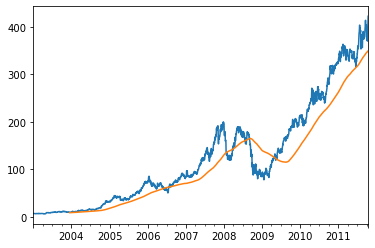

In [11]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()#250-day moving window average of Apple's stock price

**By default rolling functions require all of the values to be non-NA. This behavior can be changed to account for missing data**

In [12]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()

In [13]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

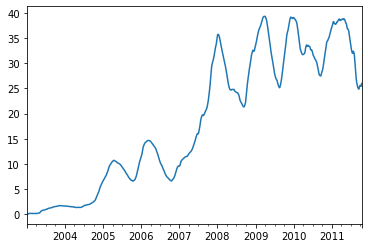

In [14]:
appl_std250.plot()

*expanding window mean* **:use the** expanding **operator insead of** rolling<br>
**The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series**

In [15]:
expanding_mean=appl_std250.expanding().mean()

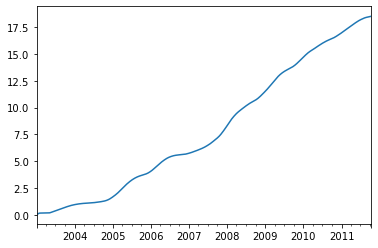

In [18]:
expanding_mean.plot()

**Calling a moving window function on a DataFrame applies the transformation to each column**

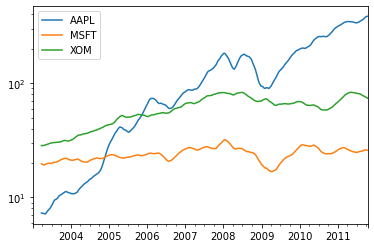

In [16]:
close_px.rolling(60).mean().plot(logy=True)

**The** rolling **function accepts a string indicating a fixed-size time rather than a set number of periods(can be useful for irregular time series)**<br>

In [19]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

**An alternative to using a static window size with equally weighted observations is to specify a constant *decay factor* to give more weight to more recent observations**<br>
**Adapts faster to changes compared with the equal-weighted version**<br>
**A popular one is to use a** *span*

In [20]:
aapl_px=close_px.AAPL['2006':'2007']

In [21]:
ma60=aapl_px.rolling(30,min_periods=20).mean()

In [23]:
ewma60=aapl_px.ewm(span=30).mean()

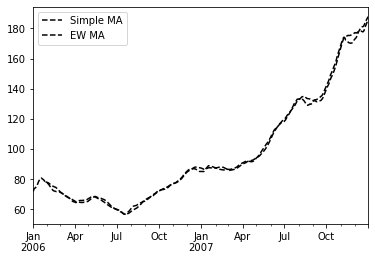

In [33]:
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k--',label='EW MA')
plt.legend()#comparing a 60-day moving averafe of Apple's stock price with an EW moving average with span=60

**Binary Moving Window Functions**<br>
**Some statistical operators, like correlation and covarianc, need to operate on two time series**

In [34]:
spx_px=close_px_all['SPX']

In [35]:
spx_rets=spx_px.pct_change()#compute percentage change

In [47]:
returns=close_px.pct_change()#compute percentage change

corr **aggregation function after we call** rolling **can then compute the rolling correlation with** spx_rets

In [49]:
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)

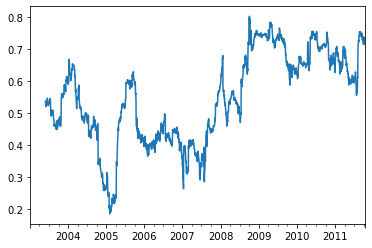

In [50]:
corr.plot()

rolling_corr **will compute the correlation of the Series with each column in the DataFrame**

In [51]:
corr=returns.rolling(125,min_periods=100).corr(spx_rets)

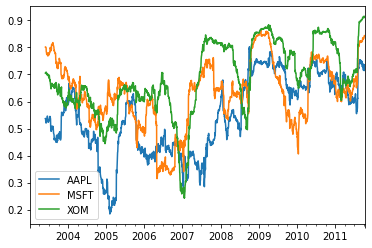

In [52]:
corr.plot()

### User Defined Moving Window Functions
**The** apply **method on** rolling **and related methods provides a means to apply an array function of your own devising over a moving window**<br>
**The only requirement is that the function provides a single value(reduction) from each piece of the array**

In [53]:
from scipy.stats import percentileofscore

In [54]:
score_at_2percent=lambda x:percentileofscore(x,0.02)

In [58]:
result=returns.AAPL.rolling(250).apply(score_at_2percent)#return the percentile rank of a particular value over the
#sample

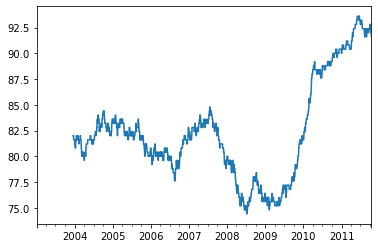

In [57]:
result.plot()

In [59]:
%%bash
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/Untitled-checkpoint.ipynb
	modified:   Data_Loading_Practice.ipynb
	modified:   NumPy_Basics_Arrays_and_Vectorized_Computation.ipynb
	modified:   Untitled.ipynb
	modified:   Untitled1.ipynb
	modified:   data_cleaning.ipynb
	modified:   datawrangling.ipynb
	modified:   group_operation.ipynb
	modified:   plotting_and_visulization.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.DS_Store
	.ipynb_checkpoints/Data_Loading_Practice-checkpoint.ipynb
	.ipynb_checkpoints/NumPy_Basics_Arrays_and_Vectorized_Computation-checkpoint.ipynb
	.ipynb_checkpoints/TimeSeries (1column)-checkpoint.ipynb
	.ipynb_checkpoints/Untitled2-checkpoint.ipynb
	.ipynb_checkpoints/chapter11_timeseries-checkpoint.ipynb
	.

In [ ]:
%%bash
git add 